## Name: Agrawal Nidhi
## Student id: 21-717-673

<br>

In [2]:
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assignment Part A04.1 begins

### Method below: 
- assigns a colour to each community of the network and draws the resulting graph <br>

In [3]:

def plotGraphComm(graph, comm, filename):
    
    colour = sns.color_palette("pastel", len(comm))
    
    i = 0
    for c in comm:                                      # Loop to assign one colour to all nodes of each community
        for node in graph.nodes():
            if node in list(c):                         # Check if node is in community c
                graph.nodes[node]['color'] = colour[i]  # Assign colour to each node of community c
        i += 1                                          # Counter to get the next colour for the next community
    
    
    print('\n\n')
    plt.figure(figsize=(10,10))                         # Set plot size for better visualization
    nx.draw(graph, with_labels=True, node_color = [graph.nodes[node]['color'] for node in graph.nodes()])
    plt.title(filename, fontsize=22)                    # Set title
    plt.show()                                          # Display graph


### Method below:
- randomises each network
- finds the communities using the greedy modularity maximization
- finds the communities using the label propagation algorithm
- calls a function to plot the graphs



In [4]:

def communities(graph, filename):
    
    # Randomize network
    graph_random = nx.algorithms.smallworld.random_reference(graph, niter = 10, connectivity=False)
    
    
    # Compute Greedy Modularity Communities of the real and randomized graph
    greedyComm = nxcom.greedy_modularity_communities(graph)               
    greedyComm_random = nxcom.greedy_modularity_communities(graph_random) 
    
    greedy_filename = filename + ': Greedy Modularity Communities'        # Set name for title of the plot
    g_real = len(greedyComm)               # Number of Greedy Modularity Communities before randomization
    g_random = len(greedyComm_random)      # Number of Greedy Modularity Communities after randomization
    
    
    # Compute Label Propagation Communities of the real and randomized graph
    labelComm = [comm for comm in nxcom.label_propagation_communities(graph)] 
    labelComm_random = [comm for comm in nxcom.label_propagation_communities(graph_random)]
    
    label_filename = filename + ': Label Propagation Communities' # Set name for title of the plot
    l_real = len(labelComm)               # Number of Label Propagation Communities before randomization
    l_random = len(labelComm_random)      # Number of Label Propagation Communities after randomization
    
    
    # Call method to plot graph
    plotGraphComm(graph, greedyComm, greedy_filename)  
    plotGraphComm(graph, labelComm, label_filename)
    
    g_list = [g_real, g_random]  # list of number of greedy modularity communities before and after randomization
    l_list = [l_real, l_random]  # list of number of label propagation communities before and after randomization
    
    return (g_list, l_list)
    
    
    
    

### Method below: 
- plots a histogram to compare the number of communities obtained before and after randomisation<br>

In [5]:

def plotGraphCommComparison(g_list, l_list, labels):
    
    # g_list = list of each datasets' list of number of greedy modularity communities before and after randomization
    # l_list = list of each datasets' list of number of label propagation communities before and after randomization
    
    
    # dictionary of g_list and l_list with community names as key
    commDict = {'Greedy Modularity Communities': g_list, 'Label Propagation Communities': l_list}
    
    # loop to plot greedy modularity community list and label propagation community list seperately
    for name, comm in commDict.items(): # for each kind of community
        
        colors = ['red', 'blue']        # set colours of bars in histogram

        x1, x2 = [], []

        for c in comm:                  # for each dataset
            x1.append(c[0])             # list of length of community before randomization
            x2.append(c[1])             # list of length of community after randomization

        x = np.arange(len(labels))      # set the label locations
        width = 0.1                     # set the width of the bars

        fig, ax = plt.subplots(figsize=(12, 5))
        ax.bar(x - width/2, x1, width, label='Before randomization') # Make a histogram with x1 values (values before randomization)
        ax.bar(x + width/2, x2, width, label='After randomization')  # Make a histogram with x2 values (values after randomization)
        ax.set_ylabel('Num of communities', fontsize = 15)                 # Set label for y axis
        ax.set_title('Comparison of the number of ' + name, fontsize = 18) # Set title of the plot
        ax.set_xticks(x)                                                   # set tick locations of the x-axis
        ax.set_xticklabels(labels, fontsize = 15)                          # Set labels for x axis
        ax.legend()
        
        # Loop to print values on each bar
        for rect in ax.patches:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, height, ha="center", va="bottom")

        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')          # Plot legend next to the graph
        plt.tight_layout()
        plt.show()
        
        print("\n\n")
        
        

### Reading datasets below: <br>

In [6]:
graph_zachary = nx.read_gml('Data/graph_karate.gml')
graph_dolphins = nx.read_gml('Data/graph_dolphins.gml')
graph_fb = nx.read_gml('Data/graph_facebook.gml')

### Calling method below:
- to compute communities of networks and plot them in different colours
- randomise each network and compare the number of communities obtained before and after randomisation <br><br>

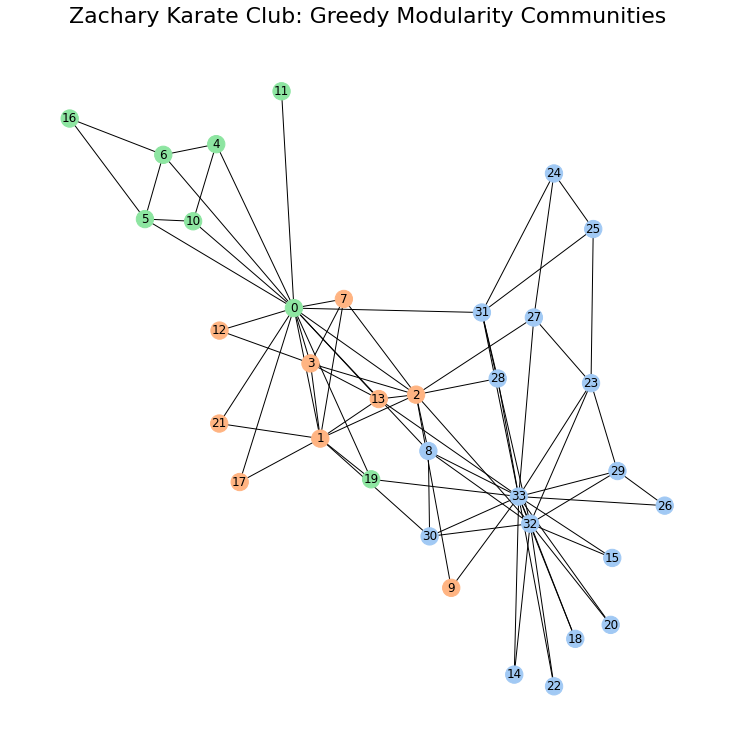

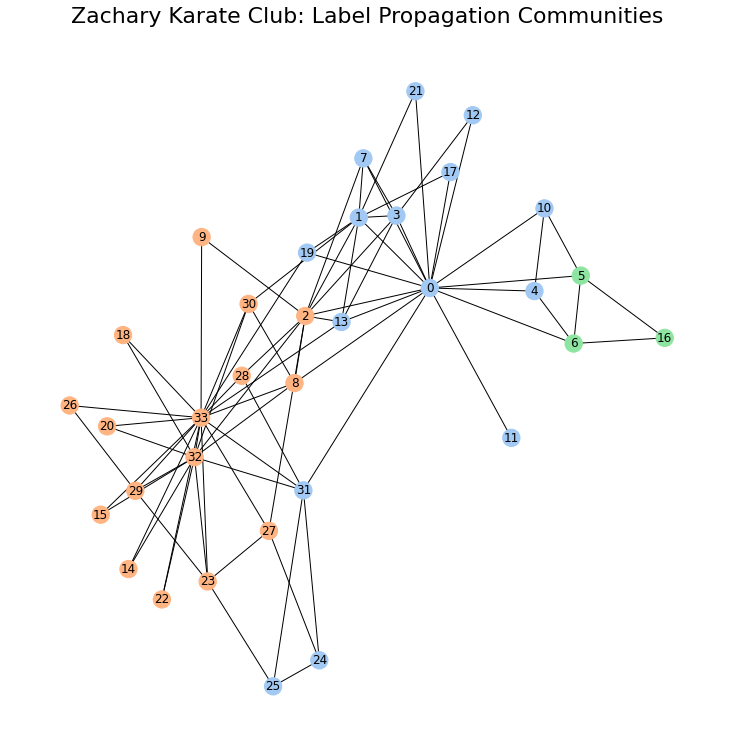

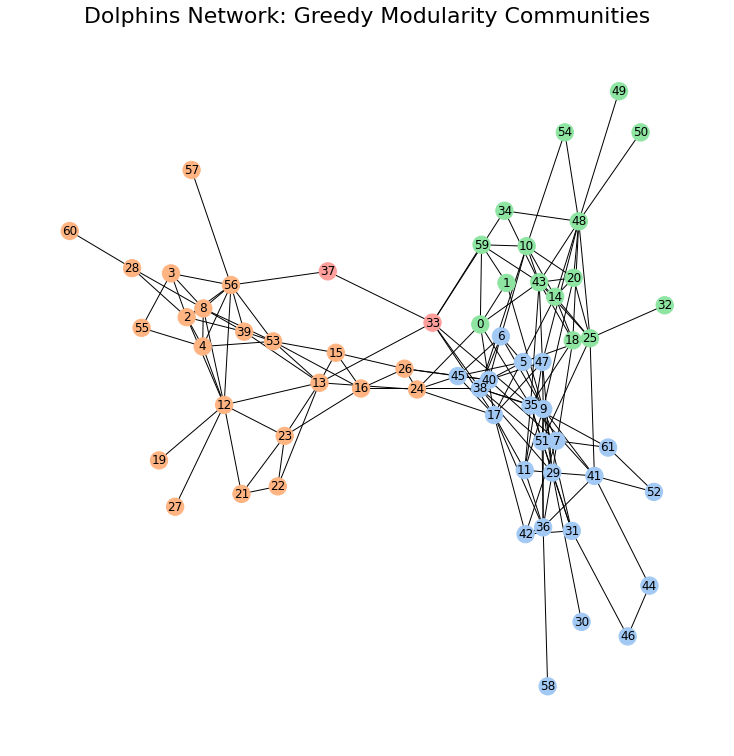

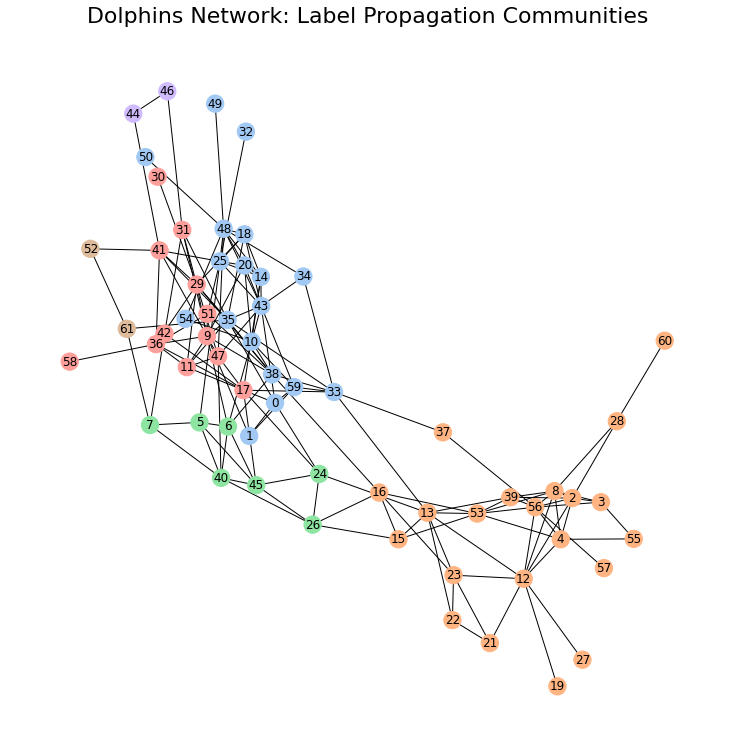

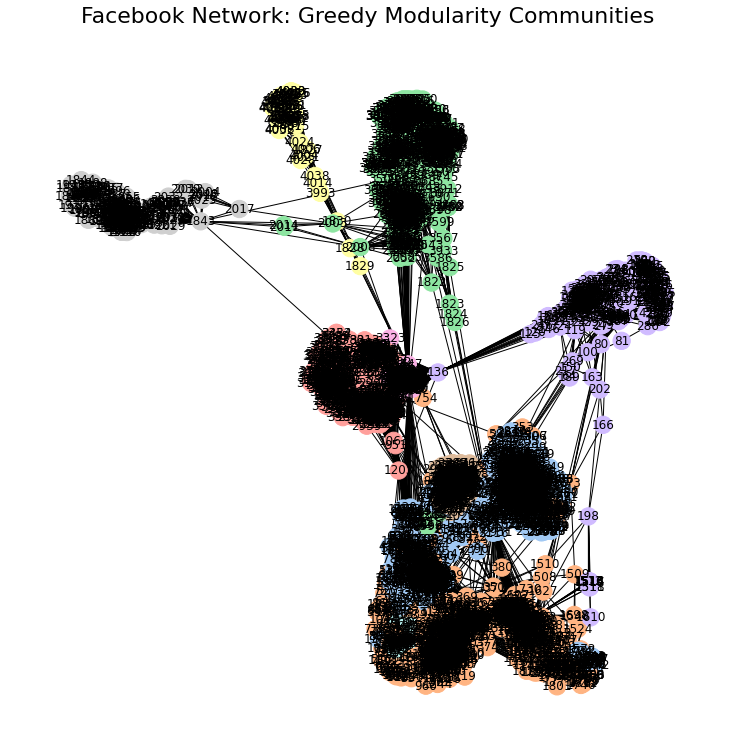

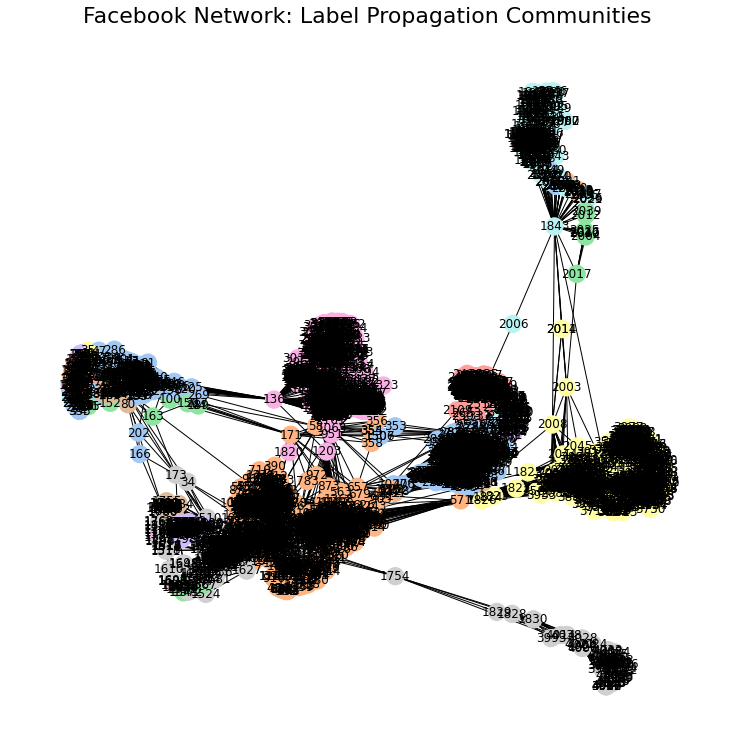

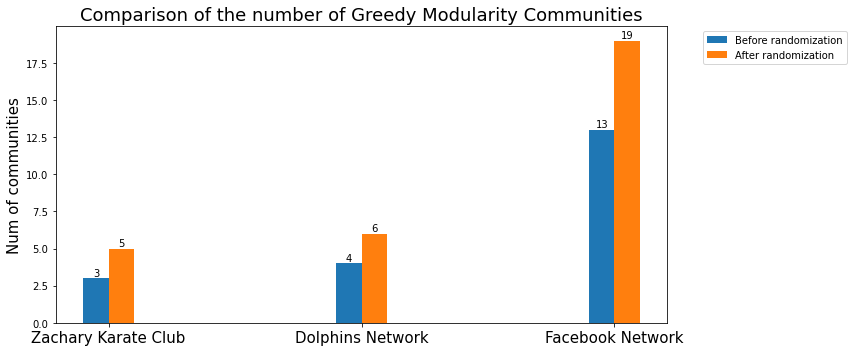

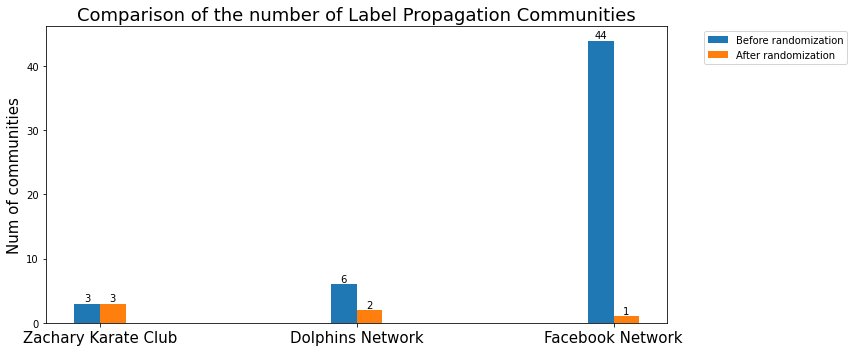

In [7]:

Zachary_g_list, Zachary_l_list = communities(graph_zachary, 'Zachary Karate Club')
Dolphins_g_list, Dolphins_l_list = communities(graph_dolphins, 'Dolphins Network')
Facebook_g_list, Facebook_l_list = communities(graph_fb, 'Facebook Network')

# list of each datasets' list of number of greedy modularity communities before and after randomization
g_list = [Zachary_g_list, Dolphins_g_list, Facebook_g_list]

# list of each datasets' list of number of label propagation communities before and after randomization
l_list = [Zachary_l_list, Dolphins_l_list, Facebook_l_list]

labels = ['Zachary Karate Club', 'Dolphins Network', 'Facebook Network']
plotGraphCommComparison(g_list, l_list, labels)


# Assignment Part A04.1 ends

# Assignment Part A04.2 begins

### Generating below, three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree:
- ⟨𝑘⟩ = 0.2
- ⟨𝑘⟩ = 1
- ⟨𝑘⟩ = 2 <br>

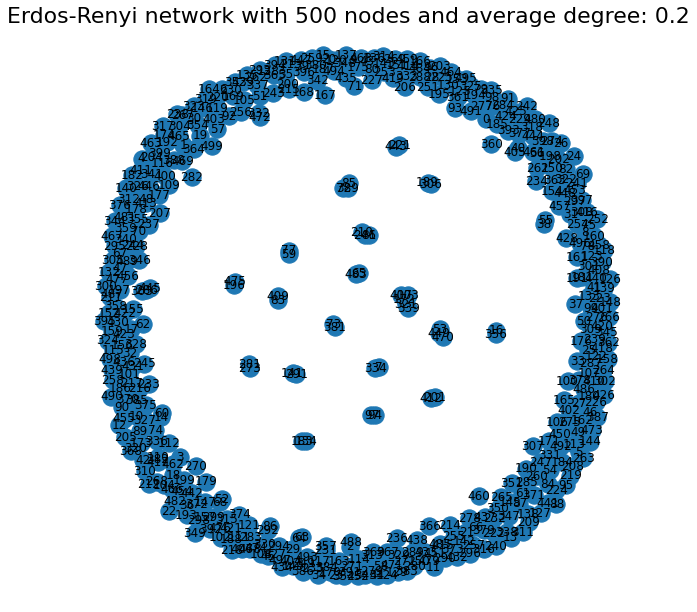

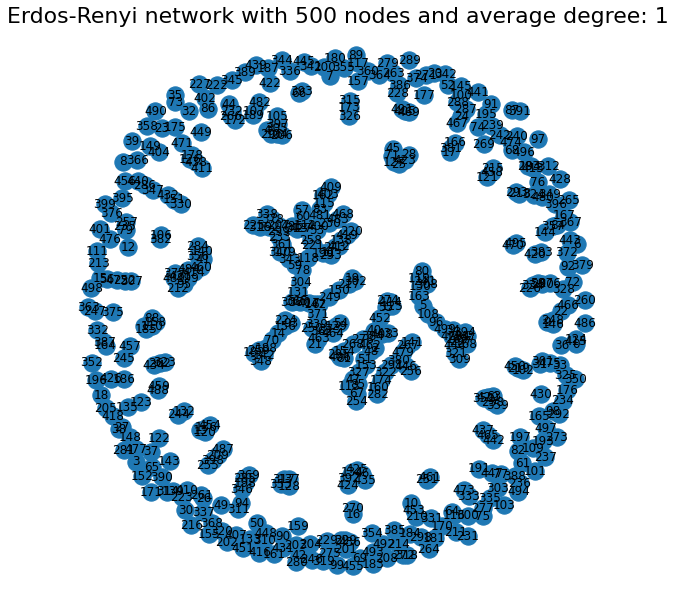

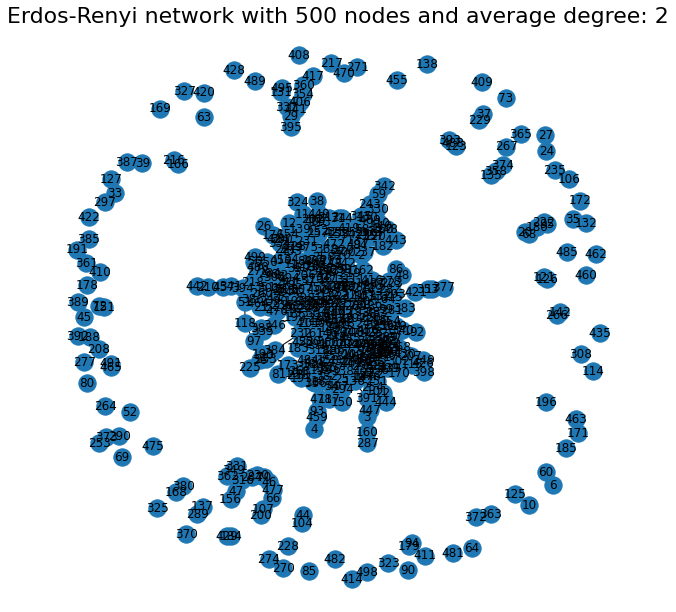

In [8]:

avgDegree = [0.2,1,2]                           # Given average degrees
n = 500                                         # Given number of nodes

for k in avgDegree:
    p = k/(n-1)                                 # Probability for edge creation
    graph = nx.erdos_renyi_graph(n, p)          # Generate Erdos-Renyi graph
    plt.figure(figsize=(8,8))                   # Set figure size for better visualization
    nx.draw(graph,pos=nx.spring_layout(graph),with_labels=True)
    #nx.draw(graph, with_labels=True)            # Draw network
    plt.title("Erdos-Renyi network with 500 nodes and average degree: " + str(k), 
              fontsize = 22)                    # Set title of plot
    plt.show()                                  # Display graph
    print("\n\n") 
    
    

### Method below: 
- computes the largest connected component of the network
- returns probability that a node belongs to the largest connected component = 𝑁_g/𝑁 (where N_g = number of nodes in the largest connected component and N = number of nodes in the whole network)

In [9]:

def component(graph):
    
    #components = nx.number_connected_components(graph)
    components = [c for c in nx.connected_components(graph)] # list of all connected components of the network
    maxcomp = max(components, key=len)                       # largest connected component of the network
    
    # probability that a node belongs to the largest connected component = 𝑁g/𝑁
    p_Ng_N = len(maxcomp)/graph.number_of_nodes()
    
    return p_Ng_N
    

### Method below:
- Plots probability that a node belongs to the largest connected component 𝑁g/𝑁 as a function of edge creation probability p
- Plots a vertical line for critical probability p𝑐= 1/𝑁 
- Plots average custering coefficient versus edge creation probability p

In [10]:

def plotCompProbability(p_critical, argDict):
    
    # p_critical = critical probability
    # argDict = dictionary of two dictionaries with key = name of values in dictionary 1 and 2
    # dictionary1 : key: edge creation probability p 
    # dictionary1 : value: 𝑁g/𝑁 (probability that a node belongs to the largest component)
    # dictionary2 : key: edge creation probability p 
    # dictionary2 : value: Average clustering coefficient of network with edge creation probability p
    
    for name, d in argDict.items():                          # for each dictionary in argDict
        plt.figure(figsize=(7,7))                            # set figure size of the plot
        if name != 'Average clustering coefficient (C)':     # if the plot is not for clustering coefficient
            plt.axvline(p_critical, color = 'Red')           # plot a vertical line for critical probability
            plt.legend(["Critical Probability = "+ str(round(p_critical,2))], 
                       fontsize = 15)                        # Set label for vertical line (critical probability)
        plt.plot(d.keys(), d.values())                       
        plt.xlabel('Edge creation probability (p)', fontsize = 15) # set label for x axis
        plt.ylabel(name, fontsize = 15)                            # set label for y axis
        plt.xscale('log')                                    # display edge creation probability p in log scale
        plt.show()                                           # display graph
        print("\n\n")
    

### Below: Generate ER graphs with𝑁 = 100 nodes for different edge creation probabilities 𝑝 ∈ [0, 1] and call method to
- Plot the probability that a node belongs to the largest connected component 𝑁g/𝑁 as a function of p
- Plot the critical probability p𝑐= 1/𝑁
- Plot the average clustering⟨𝐶⟩as a function of p

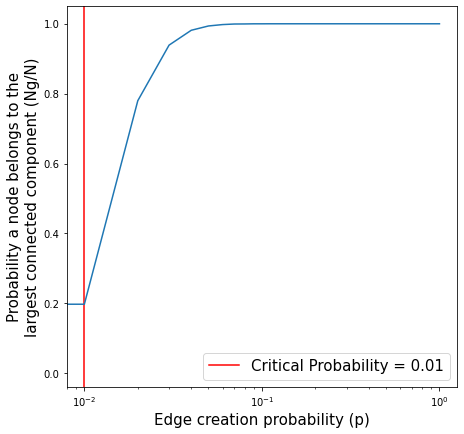

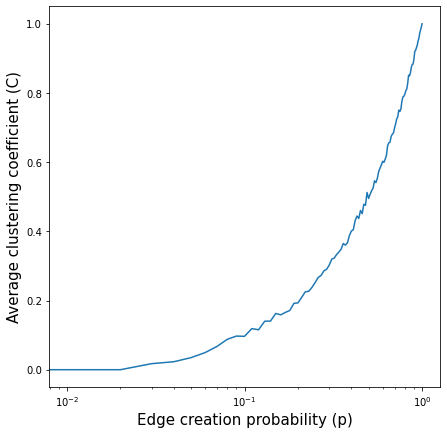

In [11]:

d = {}                        # initialize a dictionary
coeff = {}                    # initialize a dictionary

for p in np.arange(0, 1.01, 0.01): # for various edge creation probabilities p
    
    p_Ng_N_list = []              # initialize a list
    
    for i in range(0,100):        # loop to create 100 graphs for each p
        
        graph = nx.erdos_renyi_graph(100, p) # create Erdos Renyi graph with 100 nodes and edge creation probability p   
        p_Ng_N = component(graph) # call method 'component' to get probability that a node belongs to largest component
        p_Ng_N_list.append(p_Ng_N) # add probability that a node belongs to largest component to a list
        
    avg_p_Ng_N = np.mean(p_Ng_N_list) # probability that a node belongs to the largest component averaged for 100 graphs of same edge creation probability p
    
    
    # dictionary with key: edge creation probability p and
    # value: probability that a node belongs to largest component averaged for 100 graphs of same edge creation probability p
    d[p] = avg_p_Ng_N           
    
    
    # dictionary with key: edge creation probability p and
    # value: Average clustering coefficient of the network with edge creation probability p
    coeff[p] = nx.average_clustering(graph) 

argDict = {'Probability a node belongs to the\nlargest connected component (Ng/N)': d, 'Average clustering coefficient (C)': coeff}

p_critical = 1/(graph.number_of_nodes())  # Calculating critical probability = 1/N
plotCompProbability(p_critical, argDict)  # Call method to plot Ng/N versus p and average custering coeff versus p



### Observation: As the edge creation probability increases, the network becomes more connected and therefore average clustering coefficient increases.<br>

# Assignment Part A04.2 ends

# Assignment Part A04.3 begins

### Generating WS small-world networks with 𝑁 = 100 nodes and 2𝜅 = 10 neighbors for each node. As a function of the rewiring probability p:
- Plotting the average clustering⟨𝐶(𝑝)⟩/⟨𝐶(0)⟩
- Plotting the average shortest-path length 𝐷(𝑝)/𝐷(0)
- checking if it correctly reproduces the analytical result ⟨𝐶(𝑝)⟩ ≈ (3(𝜅 − 1)/2(2𝜅 − 1))*(1 − 𝑝)ˆ3

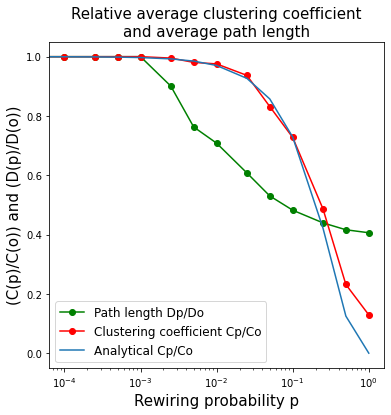

In [13]:

D = [] # initialize list for average shortest path length
C = [] # initialize list for average clustering coefficient
P = [] # initialize list for rewiring probability
Cp_analytical = [] # initialize list for analytical average clustering coefficient
Cp_list = []       # initialize list for average clustering coefficient

k = 5  # given kappa value

pList = [0, 0.0001, 0.00025, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1] # rewiring probability

for p in pList:

    # Generating WS small-world networks with 100 nodes, 10 neighbors and rewiring probability p
    graph = nx.watts_strogatz_graph(100, 10, p)
    
    if p == 0:                                      # for rewiring probability 0 
        Do = nx.average_shortest_path_length(graph) # average shortest path length of the network
        Co = nx.average_clustering(graph)           # average clustering coefficient of the network
        Co_analytical = (3*(k-1)/(2*(2*k-1)))*((1-p)*(1-p)*(1-p))   # analytical average clustering coefficient
    
    # Calculate average shortest path length of the network
    Dp = nx.average_shortest_path_length(graph)
    D.append(Dp/Do)                                 # append to list, the relative average path length (Dp/Do)
    
    # Calculate average clustering coefficient of the network
    Cp = nx.average_clustering(graph)
    C.append(Cp/Co)                                # append to list, the relative clustering coefficient (Cp/Co)
    
    c = (3*(k-1)/(2*(2*k-1)))*((1-p)*(1-p)*(1-p))   # analytical average clustering coefficient
    
    Cp_analytical.append(c/Co_analytical)           # list of relative analytical clustering coefficient
    Cp_list.append(Cp)                              # list of average clustering coefficient
    
    P.append(p)                                     # append to list, the rewiring probability
    
    
# Plot graph: Relative average clustering coefficient and average path length versus rewiring probability
plt.figure(figsize = (6,6))
plt.plot(P, D, '-ok', label = 'Path length Dp/Do', color = 'green')
plt.plot(P, C, '-ok',label = 'Clustering coefficient Cp/Co', color = 'red')
plt.xlabel('Rewiring probability p', fontsize = 15)
plt.ylabel("(C(p)/C(o)) and (D(p)/D(o))", fontsize = 15)
plt.title('Relative average clustering coefficient\nand average path length', fontsize = 15)
plt.xscale('log')


# Plot graph: To verify if analytical clustering coefficient is equivalent to average clustering coefficient
plt.plot(P, Cp_analytical, label = 'Analytical Cp/Co')

plt.legend(fontsize = 12)
plt.show()

print("\n\n")



### Observation: Analytical clustering coefficient is equivalent to average clustering coefficient as graph Cp/Co Vs p is almost same for algorithm Cp and Cp calculated by analytical method. Only for higher rewiring probability, there is a deviation.

# Assignment Part A04.3 ends

## Grazie!